In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'snr758.735154097_m58.661354946_m47.5342071598.csv')

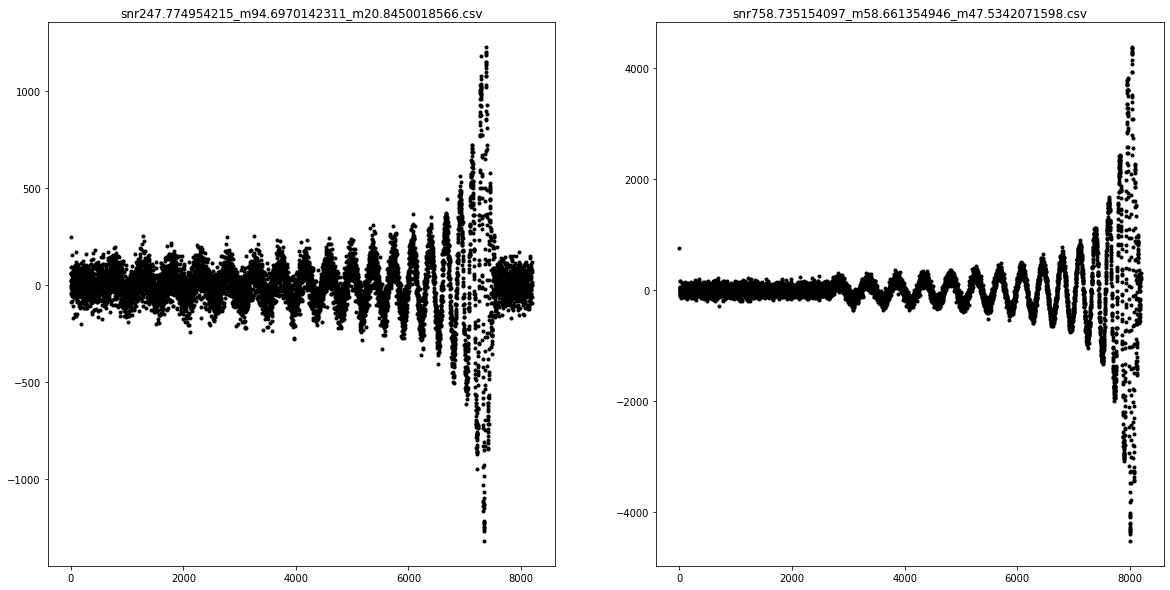

In [2]:
#dado = dado.values
plt.figure(figsize=(20,10))

data = os.listdir('data')
sample = data[-1]
dado = np.loadtxt('data/' + sample, delimiter=',')
interval = (0,-1)

plt.subplot(1,2,1)
plt.plot(dado[interval[0]:interval[1]], ".k")
plt.title(sample)



data_2 = os.listdir('data_2')
sample = data_2[15]
dado = np.loadtxt('data_2/' + sample, delimiter=',')

plt.subplot(1,2,2)
plt.plot( dado[interval[0]:interval[1]], ".k")
plt.title(sample)


In [8]:
flag_first = True
for sample in os.listdir('data_2/'):
    if 'ipynb_checkpoints' in sample or "README" in sample:
        continue
    else:    
        dado = np.loadtxt('data_2/' + sample, delimiter=',')
        if flag_first == True:
            minimum = dado.shape[0]
            flag_first = False
        if minimum > dado.shape[0]:
            minimum = dado.shape[0]
minimum


8193

In [15]:
def preprocess_data(directory):
    flag_first = True
    for data in os.listdir(directory):
        if 'ipynb_checkpoints' in data or "README" in data:
            continue
        else:
            sample = np.loadtxt(directory + data, delimiter=',')
            sample = sample[0:minimum]
            flag_m = False
            flag_snr = False
            snr = []
            count_precision = 0
            m = []
            for digit in data:

                if flag_snr == True:
                    if digit != '.' and count_precision != 4:
                        tmp.extend(digit)
                        if count_precision != 0:
                            count_precision += 1
                            if count_precision == 4:
                                flag_snr = False
                                count_precision = 0
                                tmp = float(''.join(tmp))
                                snr.append(tmp)
                    else:
                        tmp.extend(digit)
                        count_precision = 1


                if digit == "r":
                    flag_snr = True
                    tmp = []

                if flag_m == True:
                    if digit != '.' and count_precision != 4:
                        tmp.extend(digit)
                        if count_precision != 0:
                            count_precision += 1
                            if count_precision == 4:
                                flag_m = False
                                count_precision = 0
                                tmp = float(''.join(tmp))
                                m.append(tmp)
                    else:
                        tmp.extend(digit)
                        count_precision = 1


                if digit == "m":
                    flag_m = True
                    tmp = []
            sample = np.concatenate([sample,np.array(snr).reshape((1,))], axis=0)
            sample = np.concatenate([sample,np.array(m[0]).reshape((1,))], axis=0)
            sample = np.concatenate([sample,np.array(m[1]).reshape((1,))], axis=0)
            sample = sample.reshape((1,sample.shape[0]))
            
    
            if flag_first == True:
                df = np.copy(sample)
                flag_first = False
            else:
                df = np.concatenate([df,sample], axis=0)
    return df

df = preprocess_data('data/')
tmp = preprocess_data('data_2/')

#df = np.concatenate([df,tmp], axis=0)
print(df[:5])
print(tmp[:5])




[[517.32542067  66.73489465  64.49782086 ... 517.325       66.734
   64.497     ]
 [ 92.6804938   53.38862713  50.01110243 ...  92.68        53.388
   50.011     ]
 [468.32412583  72.82288486  23.56221304 ... 468.324       72.822
   23.562     ]
 [623.23173825  62.58389318  12.36572455 ... 623.231       62.583
   12.365     ]
 [503.00459543  79.27459106  57.21819379 ... 503.004       79.274
   57.218     ]]
[[715.22783256  25.20341925  14.34119845 ... 715.227       25.203
   14.341     ]
 [541.53189352   8.05330972   5.34624852 ... 541.531        8.053
    5.346     ]
 [895.32194356  77.37645185  56.80290639 ... 895.321       77.376
   56.802     ]
 [363.76238275  34.13611058  32.75814843 ... 363.762       34.136
   32.758     ]
 [323.1326334   40.54155902  37.80023945 ... 323.132       40.541
   37.8       ]]


In [16]:
df = np.concatenate([df[:,3:], tmp[:,3:]], axis = 0)
df.shape

(2774, 8193)

In [17]:
df[:5]

array([[  87.38145453,  -16.24519085,  -24.60343626, ...,  517.325     ,
          66.734     ,   64.497     ],
       [  -1.42811337,   64.1109754 ,    0.8973748 , ...,   92.68      ,
          53.388     ,   50.011     ],
       [ -72.47683278,  -54.57088899,   26.65868385, ...,  468.324     ,
          72.822     ,   23.562     ],
       [  -1.71545402, -120.76919804, -101.59139299, ...,  623.231     ,
          62.583     ,   12.365     ],
       [  85.90178612, -109.61363412,   21.97850844, ...,  503.004     ,
          79.274     ,   57.218     ]])

In [18]:
np.save('Data', df)

In [1]:
import numpy as np
df = np.load('Data.npy')
df.shape

(2774, 8193)

In [2]:
df[0,-5:]

array([-97.78350585,  32.29458969, 517.325     ,  66.734     ,
        64.497     ])

In [3]:
print(df[:2])
np.random.seed(7)
np.random.shuffle(df)
print(df[:2])

[[ 87.38145453 -16.24519085 -24.60343626 ... 517.325       66.734
   64.497     ]
 [ -1.42811337  64.1109754    0.8973748  ...  92.68        53.388
   50.011     ]]
[[ -64.75447048 -207.28331731  -98.21810244 ...  812.766
    62.656        16.477     ]
 [ -16.27198377  -11.40326762  -57.0881849  ...   50.334
    30.445         8.391     ]]


In [4]:
##Normalize?? 
from sklearn.preprocessing import StandardScaler

df_final = StandardScaler().fit_transform(df[:,:-3])

df_final.shape


(2774, 8190)

In [5]:
#df = np.concatenate([df_final, df[:,-3:]], axis=1)
df = df.reshape((df.shape[0],df.shape[1], 1))
df.shape

(2774, 8193, 1)

In [6]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="3"; 
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, TensorBoard
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Embedding, LSTM, Dense, Input, Bidirectional, Conv2D, Activation, MaxPooling2D, Flatten, Reshape
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.utils import multi_gpu_model
from keras import backend as K
K.set_image_dim_ordering('tf')

kf = KFold(n_splits=5)

split = 1
for train_index, test_index in kf.split(df[:,:,:]):
    if split != 1:
        continue
    else:

        lstm_out = 486 * 1
        batch_size = 128
        activation = 'elu'
        pad = 'valid'
        
        inp = Input(shape=(df.shape[1] - 3, 1))
        
        x = Conv1D(16, 3, padding=pad)(inp)
        x = Conv1D(16, 3, padding=pad)(x)
        x = Conv1D(16, 3, padding=pad)(x)
        x = Activation(activation)(x)
        x = MaxPooling1D(2, padding='same')(x)
        
        x = Conv1D(32, 3, padding=pad)(x)
        x = Activation(activation)(x)
        x = MaxPooling1D(2, padding='same')(x)
        
        x = Conv1D(64, 3, padding='same')(x)
        x = Activation(activation)(x)
        x = MaxPooling1D(2, padding='same')(x)
        
        x = Conv1D(128, 3, padding='same')(x)
        x = Activation(activation)(x)
        x = MaxPooling1D(2, padding='same')(x)
        
        x = Conv1D(256, 3, padding='same')(x)
        x = Activation(activation)(x)
        x = MaxPooling1D(2, padding='same')(x)
        
        x = Conv1D(256, 3, padding='same')(x)
        x = Activation(activation)(x)
        x = MaxPooling1D(2, padding='same')(x)
        
        x = Conv1D(256, 3, padding='same')(x)
        x = Activation(activation)(x)
        x = MaxPooling1D(2, padding='same')(x)
        
        
        x = Conv1D(256, 3, padding='same')(x)
        x = Conv1D(256, 3, padding='same')(x)
        x = Conv1D(256, 3, padding='same')(x)
        x = Activation(activation)(x)
        x = MaxPooling1D(2, padding='same')(x)
        
        
        
        print(x.shape)
        #x = Reshape((8193,64))(x)
        #x = Flatten()(x)
        #x = LSTM(lstm_out, return_sequences= True)(inp)
        x = LSTM(lstm_out*6)(x)
        x = Dense(lstm_out, activation = activation)(x)
        x = Dense(lstm_out, activation = activation)(x)
        #x = Dense(lstm_out, activation = activation)(x)
        #x = Dense(100, activation='relu')(x)

        y_hat = Dense(2)(x)
        y_hat = Reshape((2,1))(y_hat)

        model = Model(inp, y_hat)
        print(model.summary())
        
        def erro_percentual(y_true, y_pred):
            m1_error = (abs(y_true[0] - y_pred[0])/y_true[0])
            m2_error = (abs(y_true[1] - y_pred[1])/y_true[1])
            
            return K.mean(m1_error + m2_error)
        
        #parallel_model = multi_gpu_model(model, gpus=[3,4])
        parallel_model = model
        parallel_model.compile(loss = 'mse', optimizer='adam', metrics=[erro_percentual])
        #print(parallel_model.summary())

        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = df[train_index,:-3], df[test_index,:-3]
        Y_train, Y_test = df[train_index, -2:], df[test_index, -2:]
        #Y_train = Y_train.reshape((Y_train.shape[0], Y_train.shape[1]))
        #Y_test = Y_test.reshape((Y_test.shape[0], Y_test.shape[1]))
        SNR_Plot = df[test_index,-3]
        print(Y_train.shape)
        
        #tensorboard = TensorBoard(log_dir=f'./fold{split}')
        #save = ModelCheckpoint("[LSTM]GravWaves.hdf5", monitor='val_loss', 
        #                        verbose=1, save_best_only=True)
        parallel_model.fit(X_train, Y_train, batch_size =batch_size*1, epochs = 1000,  
                       verbose = 1, validation_data=(X_test, Y_test))
        
        '''
        pred = parallel_model.predict(X_test)

        label_binalized = np.zeros((Y_test.shape[0],2), dtype="float32")

        for i in range(Y_test.shape[0]):
            if Y_test[i] == 0.:
                label_binalized[i,0] = 1.
            else:
                label_binalized[i,1] = 1.

        pred_binalized = np.zeros((pred.shape[0],2), dtype="float32")

        for i in range(pred.shape[0]):
            if pred[i] < 0.5:
                pred_binalized[i,0] = 1.
            else:
                pred_binalized[i,1] = 1.

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(2):
            fpr[i], tpr[i], _ = roc_curve(label_binalized[:, i], pred_binalized[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])


        plt.figure()
        lw = 2
        colors = ['darkblue','darkorange']
        classes = ['AGN','Blazar',]
        for i in range(2):
            plt.plot(fpr[i], tpr[i], color=colors[i],
                     lw=lw, label=f'{classes[i]} (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC - No LSTM')
        plt.legend(loc="lower right")
        plt.savefig('ROC-No LSTM.jpg')
        plt.show()
        '''
        split += 1

Using TensorFlow backend.


(?, 32, 256)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 8190, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8188, 16)          64        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 8186, 16)          784       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8184, 16)          784       
_________________________________________________________________
activation_1 (Activation)    (None, 8184, 16)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4092, 16)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 4090, 32)          1568    

KeyboardInterrupt: 

In [7]:
pred = parallel_model.predict(X_test)

In [8]:
pred.shape

(555, 2, 1)

In [9]:
Y_test.shape

(555, 2, 1)

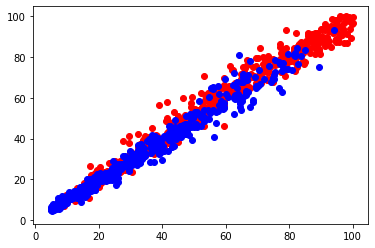

In [11]:
import matplotlib.pyplot as plt

plt.scatter(Y_test[:,0], pred[:,0], c = 'r', label = 'm1')
plt.scatter(Y_test[:,1], pred[:,1], c = 'b', label = 'm2')

In [12]:
import pandas as pd
m1 = np.concatenate([pred[:,0], Y_test[:,0]], axis = 1)
chararray = np.chararray((pred.shape[0], 1), itemsize = 2, unicode=True)
chararray[:] = "M1"
data_df = pd.DataFrame(data = m1, columns= ["Pred", "True"])
target_df = pd.DataFrame(data = chararray, columns= ["Label"])
df = pd.concat([data_df, target_df], axis=1)
df.head(5)

,Pred,True,Label
0,62.836491,62.656,M1
1,23.768013,30.445,M1
2,45.734791,45.777,M1
3,66.195023,64.966,M1
4,75.087547,65.577,M1


In [13]:
import pandas as pd
m2 = np.concatenate([pred[:,1], Y_test[:,1]], axis = 1)
chararray2 = np.chararray((pred.shape[0], 1), itemsize = 2, unicode=True)
chararray2[:] = "M2"
data_df = pd.DataFrame(data = m2, columns= ["Pred", "True"])
target_df2 = pd.DataFrame(data = chararray2, columns= ["Label"])
df_2 = pd.concat([data_df, target_df2], axis=1)
df_2.head(5)

,Pred,True,Label
0,16.329254,16.477,M2
1,12.064619,8.391,M2
2,19.428833,19.127,M2
3,54.104969,53.218,M2
4,52.285591,62.543,M2


In [14]:
df = pd.concat([df, df_2], axis=0)

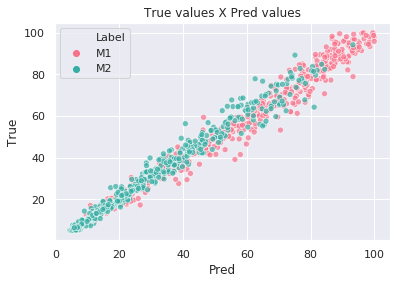

In [15]:
import seaborn as sns
sns.set()

sns.scatterplot("Pred", "True", hue = "Label", data = df, alpha = 0.7, ci="sd", palette = "husl")
plt.title("True values X Pred values")
plt.savefig("TrueXPred.png")

In [50]:
test = pred - Y_test
test = np.divide(test,Y_test)

In [51]:
test[:,0].shape

(555, 1)

In [52]:
index = np.arange(len(test[:,0]))
index = index.reshape((555,1))
index.shape

(555, 1)

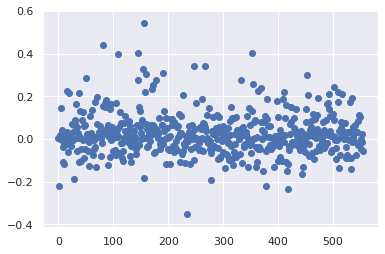

In [53]:
plt.scatter(index, test[:,0] )

In [54]:
import pandas as pd

m1 = np.concatenate([index, test[:,0]], axis = 1)
chararray = np.chararray((test.shape[0], 1), itemsize = 2, unicode=True)
chararray[:] = "M1"
data_df = pd.DataFrame(data = m1, columns= ["Data", "Error"])
target_df = pd.DataFrame(data = chararray, columns= ["Label"])
df = pd.concat([data_df, target_df], axis=1)
df.head(5)

,Data,Error,Label
0,0.0,0.002881,M1
1,1.0,-0.219313,M1
2,2.0,-0.000922,M1
3,3.0,0.018918,M1
4,4.0,0.145029,M1


In [55]:
import pandas as pd
m2 = np.concatenate([index + 555, test[:,1]], axis = 1)
chararray2 = np.chararray((test.shape[0], 1), itemsize = 2, unicode=True)
chararray2[:] = "M2"
data_df = pd.DataFrame(data = m2, columns= ["Data", "Error"])
target_df2 = pd.DataFrame(data = chararray2, columns= ["Label"])
df_2 = pd.concat([data_df, target_df2], axis=1)
df_2.head(5)

,Data,Error,Label
0,555.0,-0.008967,M2
1,556.0,0.437805,M2
2,557.0,0.015780,M2
3,558.0,0.016667,M2
4,559.0,-0.164006,M2


In [56]:
import sklearn
df = pd.concat([df, df_2], axis=0)
df = sklearn.utils.shuffle(df)
df.head(5)

,Data,Error,Label
212,212.0,-0.035525,M1
55,610.0,0.130867,M2
52,52.0,0.024987,M1
162,162.0,-0.036673,M1
348,348.0,-0.030051,M1


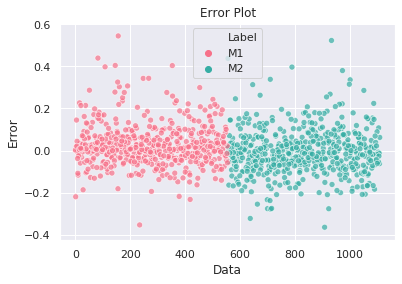

In [57]:
import seaborn as sns
sns.set()

sns.scatterplot("Data", "Error", hue = "Label", data = df, alpha = 0.7, palette = "husl")
plt.title("Error Plot")
plt.savefig("ErrorPlot.png")

In [162]:
tmp = np.concatenate([SNR_Plot, Y_test[:,0], Y_test[:,0], pred[:,0], pred[:,1]], axis=1)
np.save("Test", tmp)
df = pd.DataFrame(data = tmp, columns = ["SNR","M1 True","M2 True", "M1 Pred", "M2 Pred"] )
df.to_csv("Plot Data.csv", index=False)


In [163]:
df = pd.read_csv("Plot Data.csv")
df.head(5)

,SNR,M1 True,M2 True,M1 Pred,M2 Pred
0,812.766,62.656,62.656,61.987640,18.693289
1,50.334,30.445,30.445,23.958153,11.969067
2,921.538,45.777,45.777,46.840145,20.160648
3,49.891,64.966,64.966,67.583336,56.383305
4,359.347,65.577,65.577,73.307655,54.784412


In [66]:
import pandas as pd

m1 = np.concatenate([SNR_Plot, test[:,0]], axis = 1)
chararray = np.chararray((test.shape[0], 1), itemsize = 2, unicode=True)
chararray[:] = "M1"
data_df = pd.DataFrame(data = m1, columns= ["SNR", "Error"])
target_df = pd.DataFrame(data = chararray, columns= ["Label"])
df = pd.concat([data_df, target_df], axis=1)
df.head(5)

,SNR,Error,Label
0,812.766,0.002881,M1
1,50.334,-0.219313,M1
2,921.538,-0.000922,M1
3,49.891,0.018918,M1
4,359.347,0.145029,M1


In [67]:
import pandas as pd
m2 = np.concatenate([SNR_Plot, test[:,1]], axis = 1)
chararray2 = np.chararray((test.shape[0], 1), itemsize = 2, unicode=True)
chararray2[:] = "M2"
data_df = pd.DataFrame(data = m2, columns= ["SNR", "Error"])
target_df2 = pd.DataFrame(data = chararray2, columns= ["Label"])
df_2 = pd.concat([data_df, target_df2], axis=1)
df_2.head(5)

,SNR,Error,Label
0,812.766,-0.008967,M2
1,50.334,0.437805,M2
2,921.538,0.015780,M2
3,49.891,0.016667,M2
4,359.347,-0.164006,M2


In [68]:
import sklearn
df = pd.concat([df, df_2], axis=0)
#df = sklearn.utils.shuffle(df)
df = df.sort_values(by=['SNR'])
df.head(5)

,SNR,Error,Label
55,3.939,0.130867,M2
55,3.939,-0.127677,M1
429,4.043,-0.090163,M2
429,4.043,0.050370,M1
211,5.284,-0.060234,M1


In [69]:
print(df.shape)
#df = df[df["SNR"] < 15.0]
print(df.shape)

(1110, 3)
(1110, 3)


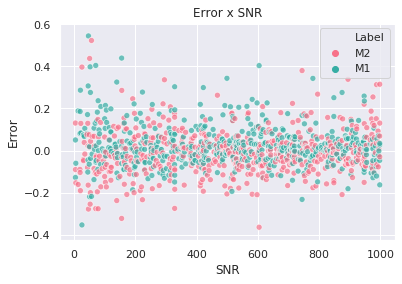

In [72]:
import seaborn as sns
sns.set()

sns.scatterplot("SNR", "Error", hue = "Label", data = df, alpha = 0.7, palette = "husl")
plt.title("Error x SNR")
plt.savefig("ErrorSNR.png")

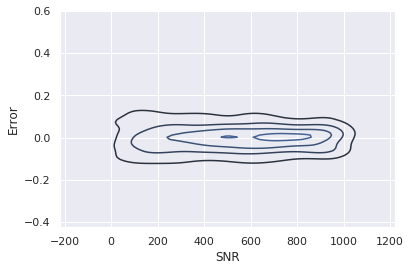

In [71]:
sns.kdeplot(df["SNR"], df["Error"], n_levels=5)

In [73]:
print(df.shape)
df = df[df["SNR"] < 15.0]
print(df.shape)

(1110, 3)
(8, 3)


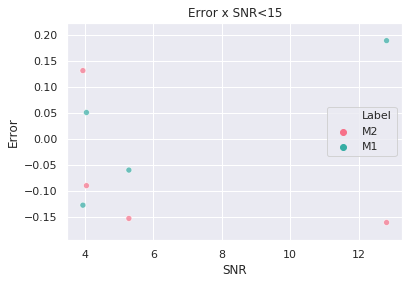

In [74]:
import seaborn as sns
sns.set()

sns.scatterplot("SNR", "Error", hue = "Label", data = df, alpha = 0.7, palette = "husl")
plt.title("Error x SNR<15")
plt.savefig("ErrorSNR<15.png")